# Projek2 WUM
# e-shop clothing 2008
## Hubert Kozubek Arkadiusz Kniaź

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
import random
import datetime as dt

In [185]:
def progress_bar(iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█'):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = '\r')
    # Print New Line on Complete
    

Data description “e-shop clothing 2008”

Variables:

1. YEAR (2008)

2. MONTH -> from April (4) to August (8)
3. DAY -> day number of the month

4. ORDER -> sequence of clicks during one session
5. COUNTRY -> variable indicating the country of origin of the IP address with the 
following categories:

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (*.biz)
44-com (*.com)
45-int (*.int)
46-net (*.net)
47-org (*.org)
6. SESSION ID -> variable indicating session id (short record)


7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
1-trousers
2-skirts
3-blouses
4-sale

========================================================

8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product 
(217 products)

========================================================

9. COLOUR -> colour of product

1-beige
2-black
3-blue
4-brown
5-burgundy
6-gray
7-green
8-navy blue
9-of many colors
10-olive
11-pink
12-red
13-violet
14-white

========================================================

10. LOCATION -> photo location on the page, the screen has been divided into six parts:

1-top left
2-top in the middle
3-top right
4-bottom left
5-bottom in the middle
6-bottom right

========================================================

11. MODEL PHOTOGRAPHY -> variable with two categories: 

1-en face
2-profile

========================================================

12. PRICE -> price in US dollars

========================================================

13. PRICE 2 -> variable informing whether the price of a particular product is higher than 
the average price for the entire product category

1-yes
2-no

========================================================

14. PAGE -> page number within the e-store website (from 1 to 5)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++

If you use this dataset, please cite:

Łapczyński M., Białowąs S. (2013) Discovering Patterns of Users' Behaviour in an E-shop - 
Comparison of Consumer Buying Behaviours in Poland and Other European Countries, 
“Studia Ekonomiczne”, nr 151, “La société de l'information : perspective européenne et 
globale : les usages et les risques d'Internet pour les citoyens et les consommateurs”, p. 144-
153.


In [3]:
df=pd.read_csv('e_shop_clothing_2008.csv',sep=';')
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [5]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])

In [6]:
df['day_in_year'] = df.loc[:,['date']].applymap(lambda x: pd.Period(x, freq='D').day_of_year)

In [7]:
df.drop(['year', 'month', 'day', 'date'], axis=1, inplace=True)

In [8]:
a = df['page 2 (clothing model)'].unique()
a = a.tolist()

In [9]:
a.sort(key=lambda x: (x[0], int(x[1:])))
a

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A38',
 'A39',
 'A40',
 'A41',
 'A42',
 'A43',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B25',
 'B26',
 'B27',
 'B28',
 'B29',
 'B30',
 'B31',
 'B32',
 'B33',
 'B34',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30',
 'C31',
 'C32',
 'C33',
 'C34',
 'C35',
 'C36',
 'C37',
 'C38',
 'C39',
 'C40',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C46',
 'C47',
 'C48',
 'C49',
 'C50',
 'C51',
 'C52',
 'C

In [10]:
# encoding categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
for feature in categorical_features:
    df[feature]=label_encoder.fit_transform(df[feature])

In [11]:
cols = list(df.columns.values)
del(cols[cols.index('order')])
del(cols[cols.index('price')])
del(cols[cols.index('day_in_year')])
cols.append('order')
cols.append('price')
cols.append('day_in_year')

In [12]:
df = df[cols]

W ostatecznej ramce danych znalazła się dodatkowa kolumna, day_in_year, zamiast poprzednich day, month, year.

In [13]:
df

,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price 2,page,order,price,day_in_year
0,29,1,1,4,1,5,1,2,1,1,28,92
1,29,1,1,7,1,6,1,2,1,2,33,92
2,29,1,2,70,10,2,1,1,1,3,52,92
3,29,1,2,51,6,6,2,2,1,4,38,92
4,29,1,2,74,4,3,2,1,1,5,52,92
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,29,24024,2,44,2,4,1,1,1,1,67,226
165470,9,24025,1,2,3,4,1,1,1,1,62,226
165471,34,24026,1,11,3,1,1,2,1,1,43,226
165472,34,24026,3,87,12,1,1,1,1,2,43,226


## Wstępna klusteryzacja (w R) przy użyciu metryki Gowera wraz z wykresami
-------------------------------------------------------

In [247]:
graph_df = pd.DataFrame(columns=['k', 'ASW'])
import os
for file in os.listdir("./R-data"):
    if file.endswith(".csv"):
        small_df = pd.read_csv("./R-data/"+file)
        graph_df = pd.concat([graph_df, small_df], axis=0)

In [248]:
graph_df = graph_df.sort_values(by=['k']).reset_index(drop=True)

In [249]:
graph_df['k'] = pd.to_numeric(graph_df['k'])
graph_df['ASW'] = pd.to_numeric(graph_df['ASW'])

In [250]:
graph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   k       92 non-null     int64  
 1   ASW     92 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [251]:
dup = graph_df.loc[:,'k'].duplicated(keep=False)
dup_index = dup[dup].index.values
duplicate_df = graph_df.iloc[dup_index,:]
k_list = list(set(duplicate_df['k'].tolist()))
indexes_to_del = []
for k in k_list:
    max_ASW_id = duplicate_df.loc[duplicate_df['k']==k,'ASW'].idxmax()
    others_mask = (duplicate_df.loc[duplicate_df['k']==k,'ASW']).index.values.tolist()
    others_mask.remove(max_ASW_id)
    indexes_to_del.extend(others_mask)
graph_df.drop(indexes_to_del, inplace=True)

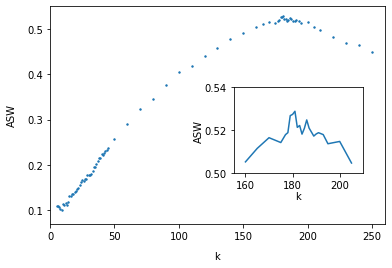

In [252]:
# plt.Figure(figsize=(20,16))
fig = plt.figure()
ax = plt.scatter(graph_df['k'], graph_df['ASW'], s=2)
plt.xlim(0, 260)
plt.ylim(0.07, 0.55)
plt.xlabel('k', labelpad = 10)
plt.ylabel('ASW', labelpad = 10)
mask = graph_df['ASW'] > 0.5 
small_graph = graph_df.loc[mask,:]
ax_new = fig.add_axes([0.55, 0.3, 0.3, 0.3]) # the position of zoom-out plot compare to the ratio of zoom-in plot 
plt.plot(small_graph['k'], small_graph['ASW'])
plt.xlim(155, 210)
plt.ylim(0.5, 0.54)
plt.xlabel('k', labelpad = 1)
plt.ylabel('ASW', labelpad = 1)
plt.show()

## Klusteryzacja ze względu na sesje

In [26]:
sessions_max = df['session ID'].max()

In [82]:
avg_price = df.groupby("session ID")["price"].mean()

In [83]:
categories = df.groupby(["session ID","page 1 (main category)"])["page 1 (main category)"].count()

In [120]:
# df_sessions = pd.DataFrame(columns=['session ID', 'country', 'day_in_year', 'trousers', 'skirts', 'blouses', 'sale', 'avg_price', 'last_product_price'])
# df_sessions = df_sessions.astype('int64')
# df_sessions = df_sessions.astype({'avg_price': 'float64'})

In [122]:
all_sesions = []
for i in range(1,sessions_max):
    session_id = i
    country = df.loc[df['session ID'] == session_id, 'country'].iloc[0]
    day_in_year = df.loc[df['session ID'] == session_id, 'day_in_year'].iloc[0]
    cat_numbers = categories[i].index
    trousers = categories[i][1] if 1 in cat_numbers else 0
    skirts = categories[i][2] if 2 in cat_numbers else 0
    blouses = categories[i][3] if 3 in cat_numbers else 0
    sale = categories[i][4] if 4 in cat_numbers else 0
    avg_product_price = avg_price[i]
    last_product_price = df.loc[df['session ID'] == session_id, 'price'].iloc[-1]
    one_session_dict = {"session ID": session_id, "country": country, "day_in_year": day_in_year, "trousers": trousers, "skirts": skirts, "blouses": blouses, "sale": sale, "avg_price": avg_product_price, "last_product_price": last_product_price}
    # df_sessions = df_sessions.append(one_session_dict, ignore_index=True)
    all_sesions.append(one_session_dict)
    progress_bar(i, sessions_max, prefix = 'Progress:', suffix = 'Complete', length = 50)
# print(df_sessions)

Empty DataFrame█████████████████████████████████████████████-| 100.0% Complete
Columns: [session ID, country, day_in_year, trousers, skirts, blouses, sale, avg_price, last_product_price]
Index: []


In [131]:
df_sessions = pd.DataFrame(all_sesions)
df_sessions.set_index('session ID', inplace=True)

Do najważniejszych cech sesji wybraliśmy kraj, dzień w roku w którym ta sesja się wydążyła, liczbę kliknięć w produkty z 4 głównych kategorii, średnią cenę klikanych produktów oraz cenę ostatniego klikniętego produktu, z racji że ostatni produkt to najprawdopodobniej ten kupiony.

In [136]:
df_sessions

,country,day_in_year,trousers,skirts,blouses,sale,avg_price,last_product_price
session ID,,,,,,,,
1,29,92,2,3,2,2,42.111111,48
2,29,92,2,5,0,3,50.000000,43
3,21,92,0,1,4,1,42.166667,43
4,21,92,2,0,2,0,45.250000,33
5,9,92,0,0,1,0,57.000000,57
...,...,...,...,...,...,...,...,...
24021,29,226,4,0,0,1,51.200000,62
24022,29,226,3,0,0,0,29.666667,33
24023,29,226,4,0,0,3,35.142857,38


In [132]:
# df_sessions.to_csv("sessions_e_shop.csv",index=False)

### Wyniki kauteryzacji sesji
Po przeprowadzeniu kauteryzacji w R, sprawdzono wyniki poprzez zastosowanie PCA

In [187]:
new_df = pd.read_csv("Clusters.csv")

In [188]:
new_df

,country,day_in_year,trousers,skirts,blouses,sale,avg_price,last_product_price,cluster
0,29,133,0,2,0,0,52.000000,52,1
1,29,213,0,9,0,0,52.444444,48,2
2,29,112,1,0,0,0,28.000000,28,1
3,29,107,2,2,0,0,54.750000,62,1
4,29,176,1,0,0,0,38.000000,38,2
...,...,...,...,...,...,...,...,...,...
12008,29,198,0,0,1,0,48.000000,48,2
12009,29,95,1,0,0,2,41.333333,38,1
12010,29,106,0,0,0,3,33.000000,33,1
12011,29,210,0,0,1,0,48.000000,48,2


In [190]:
new_df.drop(['country'], inplace=True, axis=1)
help_df = new_df.drop('cluster', axis=1)

In [193]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, svd_solver='full')

principalComponents = pca.fit_transform(help_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2', 'pc 3'])
finalDf = pd.concat([principalDf, new_df[['cluster']]], axis = 1)

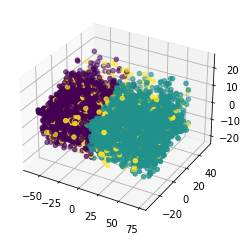

In [195]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[:,'pc 1'],finalDf.loc[:,'pc 2'],finalDf.loc[:,'pc 3'] , c=finalDf.loc[:,'cluster'], cmap='viridis')

Na wykresie możemy stwierdzić, że nie widać jasnych klastrów, które występują w sesjach. Z tego powodu można stwierdzić że zastosowanie klusteryzacji po sesjach nie była najlepszym pomysłem.